# Scikit-Learn

### Overview
Machine learning library written in Python
Simple and efficient, for both experts and non-experts
Classical, well-established machine learning algorithms
Shipped with documentation and examples
BSD 3 license

Community driven development
20~ core developers (mostly researchers)
500-1000 occasional contributors
All working publicly together on GitHub <br>
Emphasis on keeping the project maintainable
Style consistency
Unit-test coverage
Documentation and examples
Code review
Mature and stable


# Algorithms


### Supervised learning:
Linear models (Ridge, Lasso, Elastic Net, ...)
<br> Support Vector Machines
<br> Tree-based methods (Random Forests, Bagging, GBRT, ...)
<br> Nearest neighbors 
<br> Neural networks (basics)
<br> Gaussian Processes
<br> Feature selection

### Unsupervised learning:
Clustering (KMeans, Ward, ...)
<br> Matrix decomposition (PCA, ICA, ...)
<br> Density estimation
<br> Outlier detection

### |Model selection and evaluation:
<br> Cross-validation
<br> Grid-search
<br> Lots of metrics

# Classification


## Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.

The goal of supervised classification is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

## Data 

- Input data = Numpy arrays or Scipy sparse matrices ;
- Algorithms are expressed using high-level operations defined on matrices or vectors (similar to MATLAB) ;
    - Leverage efficient low-leverage implementations ;
    - Keep code short and readable. 

In [1]:
import numpy as np
# Generate data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)
labels = ["b", "r"]

# this changed the shape of y to a vector
y = np.take(labels, (y < 10))

print(X) 
print(y[:5])

[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 ...
 [-0.23142814 -1.60800704]
 [-0.60291835  6.87297279]
 [ 2.28425964  4.87408773]]
['r' 'r' 'b' 'r' 'b']


In [66]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)
['r' 'r' 'b' 'r' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'r' 'r'
 'b' 'b' 'r' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'b' 'r' 'b' 'b' 'b' 'b' 'b' 'r'
 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'b' 'b' 'r' 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'b' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'b'
 'r' 'b' 'r' 'b' 'r' 'r' 'r' 'b' 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'b'
 'b' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'b' 'b' 'r' 'r' 'b' 'r' 'r'
 'b' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'r' 'b'
 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'b' 'r' 'b' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'b'
 'r' 'r' 'b' 'r' 'b' 'r' 'r' 'b' 'r' 'r' 'b' 'r' 'b' 'r' 'r' 'b' 'b' 'r'
 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'b' 'r' 'b'
 'b' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'r' 'r'
 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'b'
 'r' 'b' 'b' 'b' 'b' 'r' 'r' 'b' 'b' 'b' 'r' 'r' 'r' 'r' 'b' 'b' 'r' 'r'
 'r' 'r' 'b' 'r' 'r' 'r' 'r' 'b' 

In [3]:
# Rows and columns can be accessed with lists, slices or masks
print(X[[1, 2, 3]])     # rows 1, 2 and 3
print(X[:5])            # 5 first rows
print(X[500:510, 0])    # values from row 500 to row 510 at column 0
print(X[y == "b"][:5])  # 5 first rows for which y is "b"

[[ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]]
[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]
 [ 4.51558296 -2.88138033]]
[-4.43836309 -2.45974437  4.33104832 -7.92069399  1.56972029  0.56451501
  4.99608298  4.75811106 -1.60421418  1.10129122]
[[-5.18412293 -1.25347025]
 [ 4.51558296 -2.88138033]
 [ 1.70826922  2.62387342]
 [-0.52606562  8.95985097]
 [-1.07591403  9.78730967]]


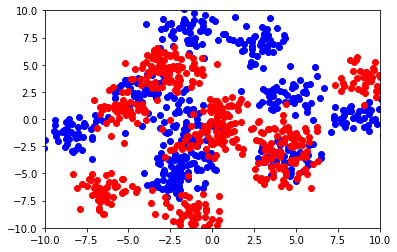

In [6]:
from matplotlib import pyplot as plt
# Plot
plt.figure()

for label in labels:
    mask = (y == label)
    plt.scatter(X[mask,0], X[mask,1], c=label)
    
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [11]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try 
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
# Estimator state is stored in instance attributes
clf._tree

In [13]:
# Make predictions  
print(clf.predict(X[:5])) 

['r' 'r' 'r' 'b' 'b']


In [14]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]]


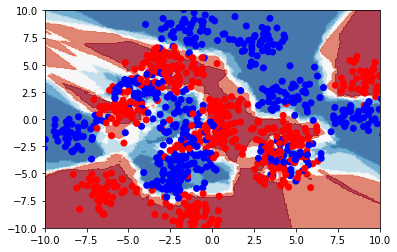

In [16]:
from tutorial import plot_surface    
plot_surface(clf, X, y)

H:\Installed Program\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


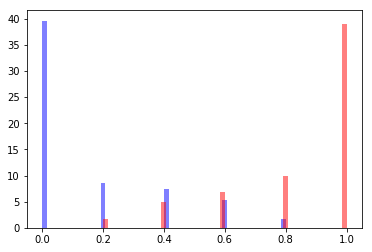

In [17]:
from tutorial import plot_histogram    
plot_histogram(clf, X, y)

# Classifier zoo

In [19]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self

In [20]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try 
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
# Estimator state is stored in instance attributes
clf._tree

### Predictors

In [22]:
# Make predictions  
print(clf.predict(X[:5])) 

['r' 'r' 'r' 'b' 'b']


In [23]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]]


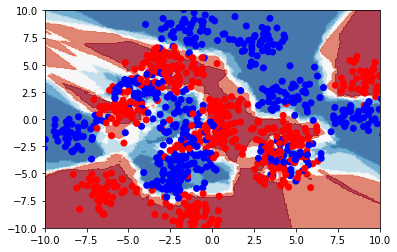

In [24]:
from tutorial import plot_surface    
plot_surface(clf, X, y)

H:\Installed Program\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


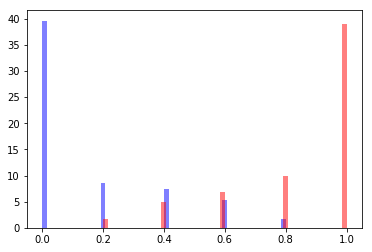

In [25]:
from tutorial import plot_histogram    
plot_histogram(clf, X, y)

### Classifier zoo

H:\Installed Program\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


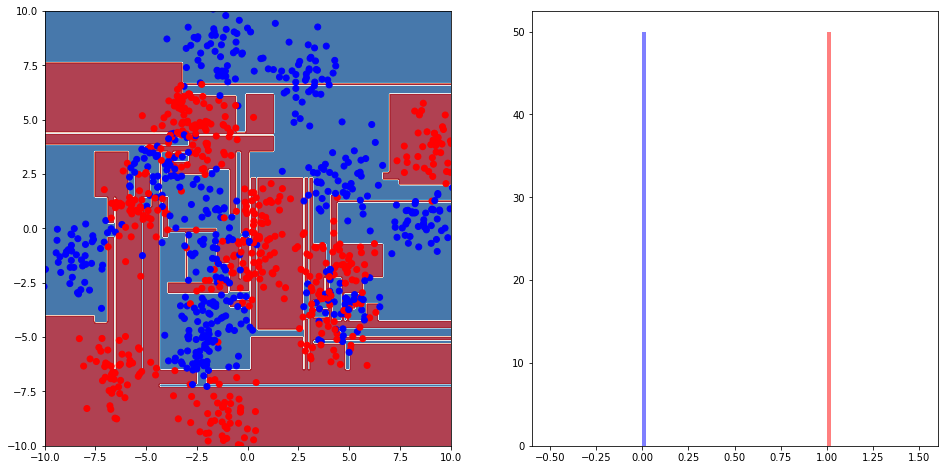

In [27]:
from tutorial import plot_clf
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

### Random Forests
Idea: Build several decision trees with controlled randomness and average their decisions.

H:\Installed Program\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


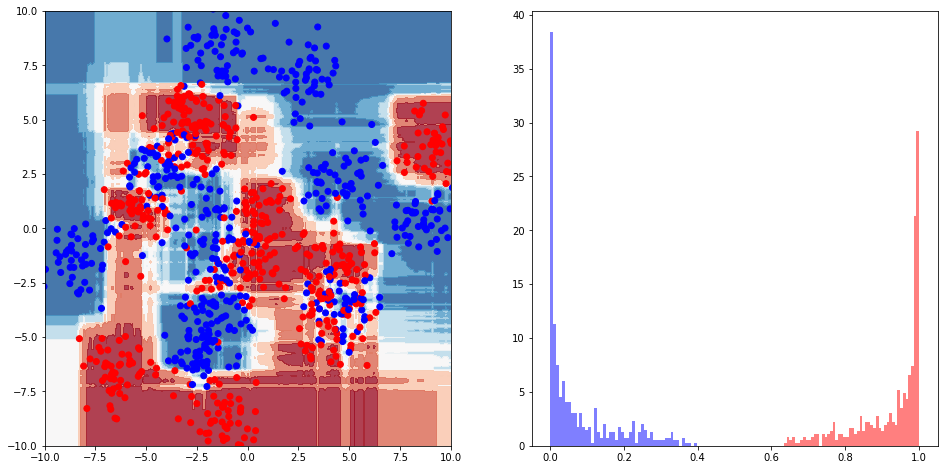

In [29]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier 
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

H:\Installed Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
H:\Installed Program\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


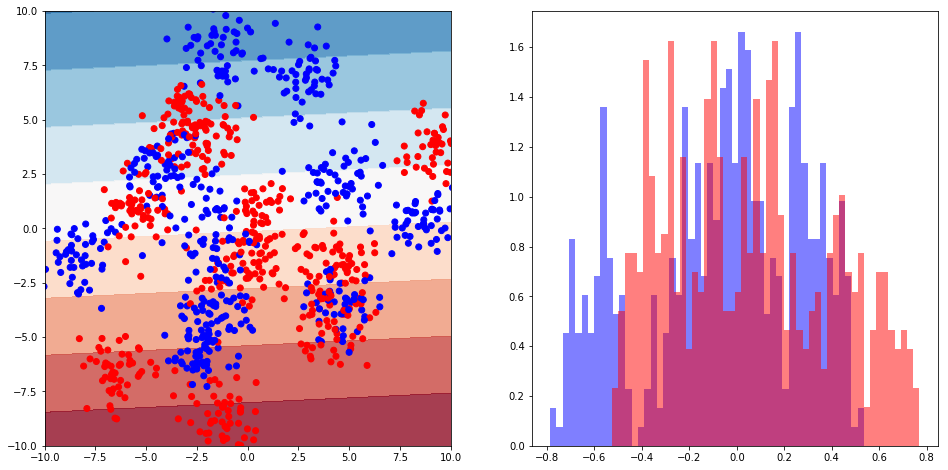

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
plot_clf(clf, X, y)

H:\Installed Program\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


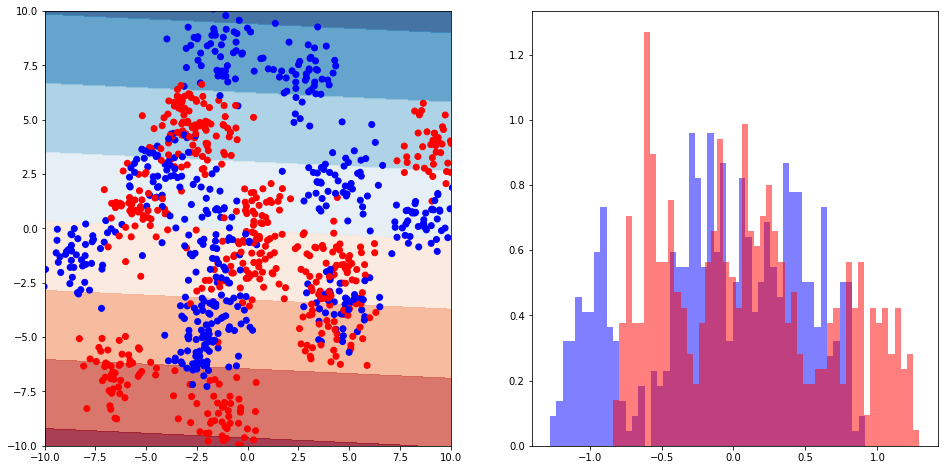

In [31]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")  # try kernel="rbf" instead
clf.fit(X, y)
plot_clf(clf, X, y)

H:\Installed Program\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


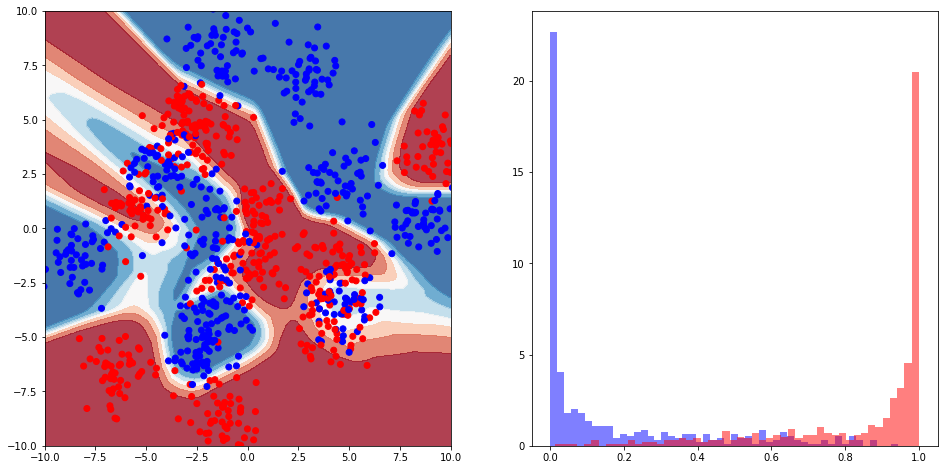

In [32]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="relu", learning_rate="invscaling")
clf.fit(X, y)
plot_clf(clf, X, y)

Evaluation

- Recall that we want to learn an estimator $\varphi$ minimizing the generalization error $Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}$.

- Problem: Since $P_{X,Y}$ is unknown, the generalization error $Err(\varphi)$ cannot be evaluated.

- Solution: Use a proxy to approximate $Err(\varphi)$.

### Training error


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.0


### Test error
Issue: the training error is a biased estimate of the generalization error.
Solution: Divide 

L
into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
Use the training set for fitting the model;
Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.10933333333333328
Test error = 0.16000000000000003


Summary: Beware of bias when you estimate model performance:
Training score is often an optimistic estimate of the true performance;
The same data should not be used both for training and evaluation.

Solution: K-Fold cross-validation. 
- Split ${\cal L}$ into K small disjoint folds. 
- Train on K-1 folds, evaluate the test error one the held-out fold.
- Repeat for all combinations and average the K estimates of the generalization error.



In [42]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(zero_one_loss(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.163000 +-0.010770


In [43]:
y_train = (y_train == "r")
y_test = (y_test == "r")
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

Default score = 0.84


### Accuracy

Definition: The accuracy is the proportion of correct predictions.

In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.84


### Precision, recall and F-measure

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

Precision = 0.8118811881188119
Recall = 0.8631578947368421
F = 0.8367346938775511


### ROC AUC

Definition: Area under the curve of the false positive rate (FPR) against the true positive rate (TPR) as the decision threshold of the classifier is varied.

ROC AUC = 0.9297744360902256


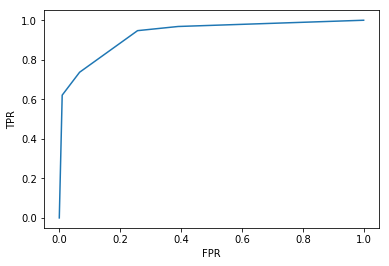

In [49]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer("roc_auc")
print("ROC AUC =", roc_auc_scorer(clf, X_test, y_test))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Confusion matrix

Definition: number of samples of class $i$ predicted as class $j$.

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[86, 19],
       [13, 82]], dtype=int64)

# Exercise Part 1:

In [56]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [63]:
data = load_iris()
data.target[[10, 25, 50]]

array([0, 0, 1])

In [59]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [82]:
type(data.values)

builtin_function_or_method

In [119]:
#Preparation for Training/ Fitting
X = data.data  #features
y = data.target #classes

In [103]:
# A classifier for Training or Fitting and Training Error
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X,y)
print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.033333333333333326


In [104]:
# Create training and test sets for cities data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.0267857142857143
Test error = 0.052631578947368474


In [107]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.9473684210526315


In [115]:
#Precision Recall and F Measure
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test), average=None))
print("Recall =", recall_score(y_test, clf.predict(X_test), average=None))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1, average=None))

Precision = [1.         0.9375     0.92307692]
Recall = [1.         0.9375     0.92307692]
F = [1.         0.9375     0.92307692]


In [148]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(data.target_names)
print(cm)

['setosa' 'versicolor' 'virginica']
[[ 9  0  0]
 [ 0 16  0]
 [ 0  0 13]]


# Your Turn


In [149]:
#Try to analyze the best classifier for the iris data set.

# Exercise Part 2

In [153]:
import pandas as pd
#path of the file
path_of_the_file = "C:/Users/dadidelux/Desktop/DSP Training Files/DataSets/ml-data/Diabetes.csv"
diabetes = pd.read_csv(path_of_the_file, encoding='utf-8')

In [162]:
features = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)']
diabetes

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Diabetes
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


In [164]:
X = diabetes[features]  #features
y = diabetes['Diabetes'] #classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [165]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.19618055555555558
Test error = 0.30208333333333337


In [166]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.6979166666666666


In [167]:
#Precision Recall and F Measure
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test), average=None))
print("Recall =", recall_score(y_test, clf.predict(X_test), average=None))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1, average=None))

Precision = [0.74045802 0.60655738]
Recall = [0.80165289 0.52112676]
F = [0.76984127 0.56060606]


In [168]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(data.target_names)
print(cm)

['setosa' 'versicolor' 'virginica']
[[97 24]
 [34 37]]


# Your Turn

In [ ]:
#create the best classification model for model